# Analyze score distributions of pairs of the Balance Faces in the Wild (BFW) dataset.

Load table in `data/bfw-datatable.pkl` to extract all features and store in the datatable. Overwrites the table to `data/bfw-datatable.pkl`.
using fundalmental signal detection theory lists of feature pairs

## Add project code to PYTHONPATH, if not already there
Check that _path_package_ is set to _code_ directory on respective system

In [1]:
import pathlib
path_package=f'{str(pathlib.Path().home())}/bfw-data/facerec-bias-bfw/code'
import sys
if path_package not in sys.path:
    sys.path.append(path_package)
    

In [7]:
%matplotlib inline
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load out custom tool for loading and processing the data
from facebias.io import load_bfw_datatable

In [39]:
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

## Load the data

Read in the data as a pandas.DataFrame and show the first few rows.

In [4]:
data = load_bfw_datatable('../../data/bfw-datatable.pkl', cols=['p1', 'p2', 'score', 'a1', 'a2', 'label', 'g1', 'g2'])
data.head()

,p1,p2,label,score,a1,a2
0,asian_females/n000009/0010_01.jpg,asian_females/n000009/0043_01.jpg,1,0.820039,AF,AF
1,asian_females/n000009/0010_01.jpg,asian_females/n000009/0120_01.jpg,1,0.719199,AF,AF
2,asian_females/n000009/0010_01.jpg,asian_females/n000009/0122_02.jpg,1,0.732029,AF,AF
3,asian_females/n000009/0010_01.jpg,asian_females/n000009/0188_01.jpg,1,0.607093,AF,AF
4,asian_females/n000009/0010_01.jpg,asian_females/n000009/0205_01.jpg,1,0.629153,AF,AF


In [5]:
if 'score' not in data:
    warnings.warn('scores not stored in table. See Demo 1 in notebooks/ before proceedings')

In [27]:
classes = np.unique(list(np.unique(data.a1)) + list(np.unique(data.a2)))
n_classes = len(classes)
xlabels = {'A': 'Asian', 'B': 'Black', 'I': 'Indian', 'W': 'White'}
ylabels = {'M': 'Male', 'F': 'Female'}
opts = [{'color': 'g', 'alpha': 0.7, 'norm_hist': True}, {'color': 'r', 'alpha': 0.7, 'norm_hist': True}]
print(f"there are {n_classes} types: {classes}")

there are 8 types: ['AF' 'AM' 'BF' 'BM' 'IF' 'IM' 'WF' 'WM']


Processing: AF
Processing: AM
Processing: BF
Processing: BM
Processing: IF
Processing: IM
Processing: WF
Processing: WM


Text(0.5, 0.98, 'Signal Detection Curve per Subgroup')

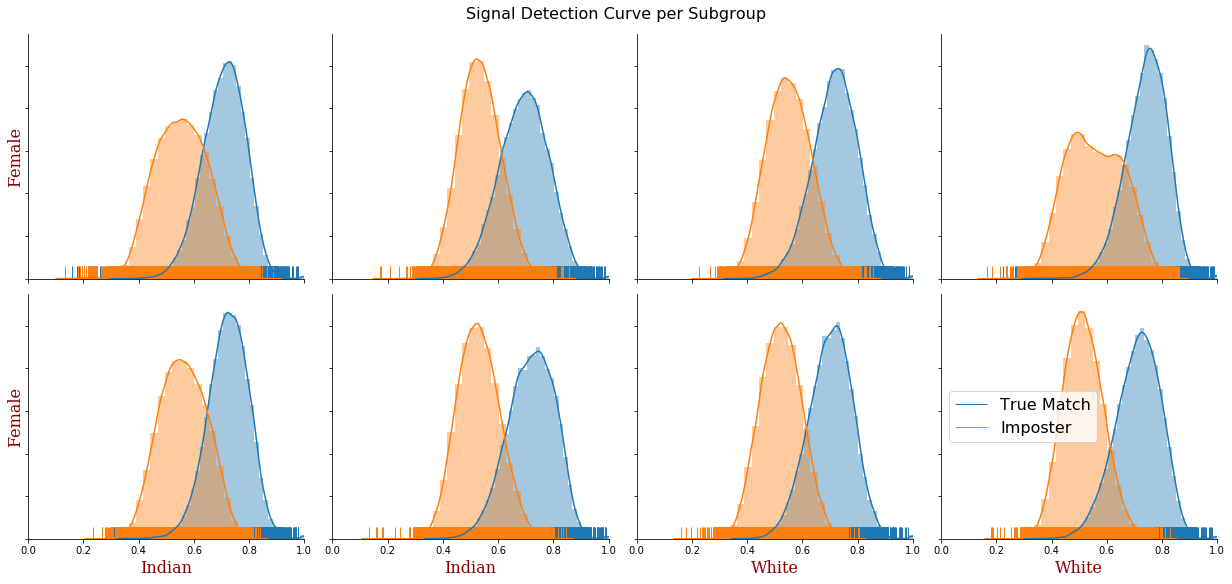

In [44]:
fig, ax = plt.subplots(2, int(n_classes / 2), sharex='all', sharey='all', figsize=(17, 2 * n_classes / 2), constrained_layout=True)


for i, (cur_class, axi) in enumerate(zip(classes, ax.flat)):
    print("Processing: {}".format(cur_class))
    df_cur = data.loc[data.a1==cur_class][['label', 'score']]
    sns.distplot(df_cur.loc[df_cur.label == 1, 'score'], np.linspace(-0.3, 1.0, 80), ax=axi, *opts[0])
    sns.distplot(df_cur.loc[df_cur.label == 0, 'score'], np.linspace(-0.3, 1.0, 50), ax=axi, *opts[1])
    #axi.set_xticks((0.0,0.25,0.5,0.75,1.0))
    axi.set_xlim((0.0,1.0))
    if i > 3:
        axi.set_xlabel(xlabels[cur_class[0]], fontdict=font)
        
    else:
        axi.set_xlabel(None)
    for tick in axi.yaxis.get_major_ticks():
        tick.label1.set_visible(False)
    if not np.mod(i, int(n_classes / 2)):
        axi.set_ylabel(ylabels[cur_class[1]], fontdict=font)
        
    sns.despine(ax=axi)


plt.legend(['True Match', 'Imposter'], fontsize=font['size'], loc='best')
fig.suptitle('Signal Detection Curve per Subgroup', fontsize=font['size'])
